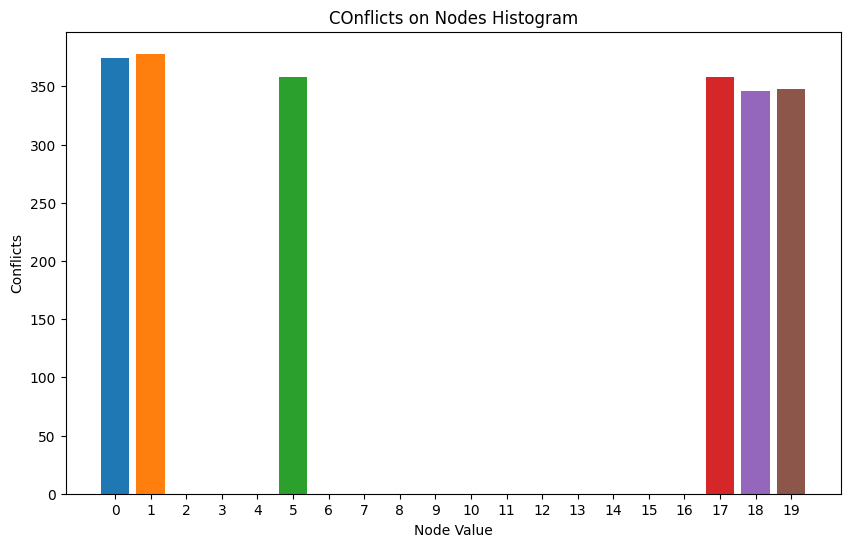

Total nodes analyzed: 2162
Unique node values: [0, 1, 5, 17, 18, 19]


In [5]:
import re
import matplotlib.pyplot as plt

def analyze_node_histogram(log_file_path):
    # Function to extract node value from a single entry
    def extract_node(entry):
        match = re.search(r'node=(\d+)', entry)
        return int(match.group(1)) if match else None

    # Read the log file and extract node values
    node_values = []
    with open(log_file_path, 'r') as file:
        current_entry = ""
        for line in file:
            if line.strip() == "***":
                if current_entry:
                    node = extract_node(current_entry)
                    if node is not None:
                        node_values.append(node)
                current_entry = ""
            else:
                current_entry += line

    # Plot histogram
    plt.figure(figsize=(10, 6))
    # Count the frequency of each node value
    node_counts = {}
    for node in node_values:
        if node in node_counts:
            node_counts[node] += 1
        else:
            node_counts[node] = 1

    # Sort the node counts by node value
    sorted_node_counts = sorted(node_counts.items())
    
    # Bar plot the sorted node counts
    for node, count in sorted_node_counts:
        plt.bar(node, count)
    plt.xlabel('Node Value')
    plt.xticks(range(min(node_values), max(node_values) + 1))
    plt.ylabel('Conflicts')
    plt.title('COnflicts on Nodes Histogram')
    plt.show()

    return node_values

# Usage
log_file_path = 'application.log'
node_values = analyze_node_histogram(log_file_path)
print(f"Total nodes analyzed: {len(node_values)}")
print(f"Unique node values: {sorted(set(node_values))}")